# **Part III: Network Architecture**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing. sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import statistics
import matplotlib.pyplot as plt
import sys

In [ ]:
df = pd.read_csv('/content/D213_clean_Stopwords.csv'  )


In [ ]:
# Identify vocabulary size & tokens
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Reviews'])
vocab_size =  len(tokenizer.word_index) + 1
print("Vocabulary_size: ", len(tokenizer.word_index) + 1)
print(tokenizer.word_index)

Vocabulary_size:  2938
{'movie': 1, 'film': 2, '0': 3, '1': 4, 'one': 5, 'bad': 6, 'good': 7, 'like': 8, 'acting': 9, 'time': 10, 'really': 11, 'great': 12, 'even': 13, 'see': 14, 'characters': 15, 'well': 16, 'ever': 17, '10': 18, 'movies': 19, 'plot': 20, 'story': 21, 'made': 22, 'best': 23, 'also': 24, 'films': 25, 'character': 26, 'would': 27, 'script': 28, 'seen': 29, 'way': 30, 'love': 31, 'make': 32, 'watching': 33, 'think': 34, 'real': 35, 'could': 36, 'every': 37, 'much': 38, 'work': 39, 'look': 40, 'funny': 41, 'scenes': 42, 'actors': 43, 'better': 44, 'cast': 45, 'never': 46, 'wonderful': 47, 'little': 48, 'watch': 49, 'show': 50, 'everything': 51, 'excellent': 52, 'anyone': 53, 'totally': 54, 'music': 55, 'scene': 56, 'waste': 57, 'people': 58, 'screen': 59, 'go': 60, 'years': 61, 'nothing': 62, 'stupid': 63, 'awful': 64, 'get': 65, 'know': 66, 'still': 67, 'many': 68, 'man': 69, 'art': 70, 'two': 71, 'right': 72, 'say': 73, 'recommend': 74, 'dialogue': 75, 'worth': 76, 'wr

In [ ]:


# Determime min, med, and max lengths of reviews
review_length = []
for char_len in df.Reviews:
    review_length.append(len(char_len.split(' ')))

review_max = np.max(review_length)
review_min = np.min(review_length)
review_median = np.median(review_length)
print("Max length of sequences is: ", review_max)
print("Mid length of sequences is: ", review_median)
print("Min length of sequences is: ", review_min)


#Best Sequence Length
review_length_max = []
for char_len in df.Reviews:
    review_length_max.append(len(char_len.split(' ')))

max_length = int(round(np.mean(review_length_max), 0))
print ("Max length: ", max_length)



Max length of sequences is:  781
Mid length of sequences is:  6.0
Min length of sequences is:  1
Max length:  10


In [ ]:

# Splitting the data into training and test sets
X = df['Reviews']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state = 15, stratify = y)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)


In [ ]:
# View the training and testing sample sizes
print("Training size: ", X_train.shape)
print("Testing size: ", X_test.shape)

Training size:  (598,)
Testing size:  (150,)


In [ ]:

#Applying Tokenizer on Training dataset

tokenizer2 = Tokenizer(num_words=vocab_size )
tokenizer2.fit_on_texts(X_train)
word_index = tokenizer2.word_index
print(tokenizer2.word_index)



# Apply padding to training data
sequences_train = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding='post' )

# Apply padding to testing data
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding='post' )

# Display the padded sequence
np.set_printoptions(threshold=sys.maxsize)
padded_train[1]



# Convert padded data to numpy array to be used in model.
training_padded = np.array(padded_train)
training_label = np.array(y_train)
test_padded = np.array(padded_test)
test_label = np.array(y_test)


{'movie': 1, 'film': 2, '0': 3, '1': 4, 'one': 5, 'bad': 6, 'good': 7, 'like': 8, 'acting': 9, 'time': 10, 'really': 11, 'great': 12, 'even': 13, 'characters': 14, 'see': 15, 'well': 16, 'ever': 17, 'story': 18, 'movies': 19, 'best': 20, 'films': 21, '10': 22, 'made': 23, 'plot': 24, 'seen': 25, 'also': 26, 'script': 27, 'watching': 28, 'way': 29, 'real': 30, 'character': 31, 'could': 32, 'funny': 33, 'wonderful': 34, 'would': 35, 'cast': 36, 'much': 37, 'actors': 38, 'love': 39, 'make': 40, 'never': 41, 'think': 42, 'every': 43, 'work': 44, 'scenes': 45, 'excellent': 46, 'everything': 47, 'show': 48, 'totally': 49, 'scene': 50, 'still': 51, 'dialogue': 52, 'little': 53, 'nothing': 54, 'anyone': 55, 'get': 56, 'know': 57, 'music': 58, 'recommend': 59, 'man': 60, 'years': 61, 'waste': 62, 'two': 63, 'better': 64, 'thing': 65, 'watch': 66, 'awful': 67, 'many': 68, 'right': 69, 'saw': 70, 'art': 71, 'people': 72, 'stupid': 73, 'enough': 74, 'line': 75, 'pretty': 76, 'screen': 77, 'though'

In [ ]:

# Set parameters for model
activation = 'softmax'
loss = 'categorical_crossentropy' #You can use binary, categorical, or sparse_categ
optimizer = 'adam'

num_epochs = 30
length_reviews = df.Reviews.str.len()
embedding_size = round ( statistics.mean(length_reviews))

# Define early_stopping_monitor



early_stopping_monitor = EarlyStopping(patience=2)

# Define callback
callback = tf.keras.callbacks. EarlyStopping(monitor='loss', patience=3)

#Create or build the NN model
from keras.layers import Dense

model = tf.keras.Sequential([
tf.keras.layers. Embedding(input_dim=vocab_size, output_dim=embedding_size,  input_length=max_length),
tf.keras. layers.GlobalAveragePooling1D(),
tf.keras.layers.Dense(100, activation='relu'),
tf.keras.layers.Dense(50, activation='relu'),
tf.keras. layers.Dense(2, activation=activation)
])


# Compile model, set optimizer, loss function, and performance metric
from sklearn import metrics
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model. summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 69)            202722    
                                                                 
 global_average_pooling1d_1  (None, 69)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 100)               7000      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 214874 (839.35 KB)
Trainable params: 214874 (839.35 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
# Run model fit, epochs with batch sizes
history = model.fit(training_padded, training_label, epochs=num_epochs, batch_size=50,
validation_split = 0.3, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/30
9/9 [==============================] - 1s 36ms/step - loss: 0.6923 - accuracy: 0.4928 - val_loss: 0.6916 - val_accuracy: 0.5222
Epoch 2/30
9/9 [==============================] - 0s 10ms/step - loss: 0.6819 - accuracy: 0.7105 - val_loss: 0.6858 - val_accuracy: 0.5833
Epoch 3/30
9/9 [==============================] - 0s 10ms/step - loss: 0.6602 - accuracy: 0.7799 - val_loss: 0.6740 - val_accuracy: 0.6111
Epoch 4/30
9/9 [==============================] - 0s 10ms/step - loss: 0.6103 - accuracy: 0.8445 - val_loss: 0.6465 - val_accuracy: 0.6667
Epoch 5/30
9/9 [==============================] - 0s 9ms/step - loss: 0.5137 - accuracy: 0.9211 - val_loss: 0.5957 - val_accuracy: 0.7556
Epoch 6/30
9/9 [==============================] - 0s 9ms/step - loss: 0.3717 - accuracy: 0.9474 - val_loss: 0.5370 - val_accuracy: 0.7500
Epoch 7/30
9/9 [==============================] - 0s 7ms/step - loss: 0.2170 - accuracy: 0.9809 - val_loss: 0.4843 - val_accuracy: 0.7611
Epoch 8/30
9/9 [==============

# Part IV: Model **Evaluation**

In [ ]:
# Verify model accuracy on test data (data not seen by the model earlier)
score = model.evaluate(test_padded, test_label, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.7066372632980347 / Test accuracy: 0.6933333277702332


In [ ]:
# Verify model accuracy on training data
score = model.evaluate(training_padded, training_label, verbose=0)
print(f'Training loss: {score[0]} / Training accuracy: {score[1]}')

Training loss: 0.1664130985736847 / Training accuracy: 0.9247491359710693


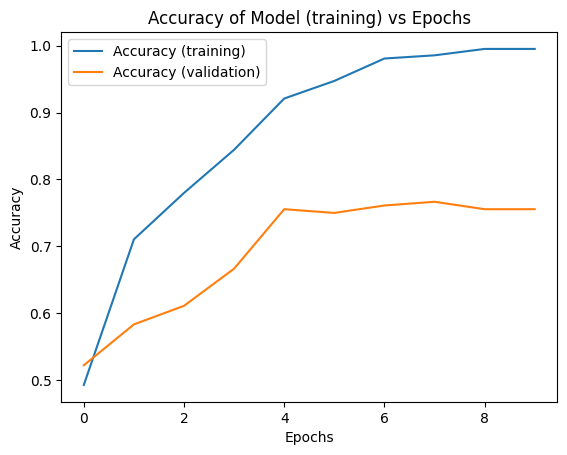

In [ ]:
plt.plot(history.history['accuracy'], label= "Accuracy (training)")
plt.plot(history.history['val_accuracy'], label= "Accuracy (validation)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy of Model (training) vs Epochs")
plt.show()

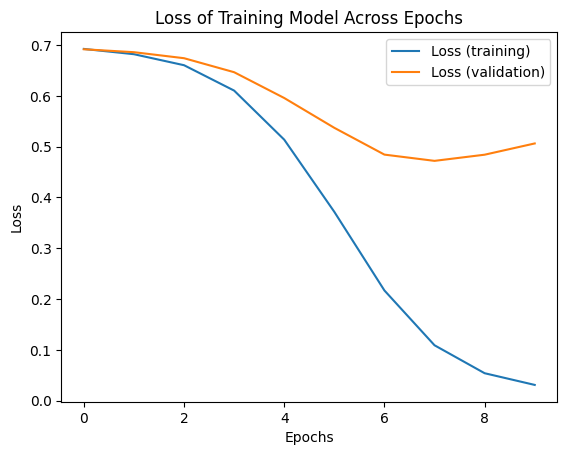

In [ ]:
plt.plot(history.history['loss'], label= "Loss (training)")
plt.plot(history.history['val_loss'], label= "Loss (validation)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss of Training Model Across Epochs")
plt.show()

In [ ]:
# Perform predictions on the model
predictions = model.predict(test_padded)

# Verify the predicted sentiment by comparing to actual Label from test data

i = 1 #Take any text from test data to verify.

print("Predicted review text:" , X_test[i], "\n")
print("Predicted:", "Negative" if predictions[i][0] >= 0.5 else "Positive" , "review")
print("Actual: ", "Negative" if y_test[i] == 0 else "Positive" , "review")

5/5 [==============================] - 0s 2ms/step
Predicted review text: sure lost flat characters audience nearly half walked 

Predicted: Negative review
Actual:  Negative review


In [ ]:
# Save the model
model.save('SentimentAnalysisModel')